<a href="https://colab.research.google.com/github/itzmariu/SeminarThesisOM/blob/main/SeminarThesisOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grundeinstellungen

Verbindung zu Google Drive herstellen:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Forschungsfrage: Discount and Sales

## ProductID über Zeit (Figure 4)

Error decoding the data 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427)
Error decoding the data 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526)
Error decoding the data 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834)
Error decoding the data 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873)
Error decoding the data 2023-09-23.json: Unterminated string starting at: line 18702 column 322 (char 14997482)
Error decoding the data 2023-10-09.json: Expecting value: line 7 column 1 (char 3742)
Error decoding the data 2023-10-14.json: Expecting value: line 17490 column 1 (char 13923667)
Error decoding the data 2023-10-16.json: Expecting value: line 7 column 1 (char 3631)
Error decoding the data 2023-11-20.json: Expecting value: line 78971 column 1 (char 61400645)


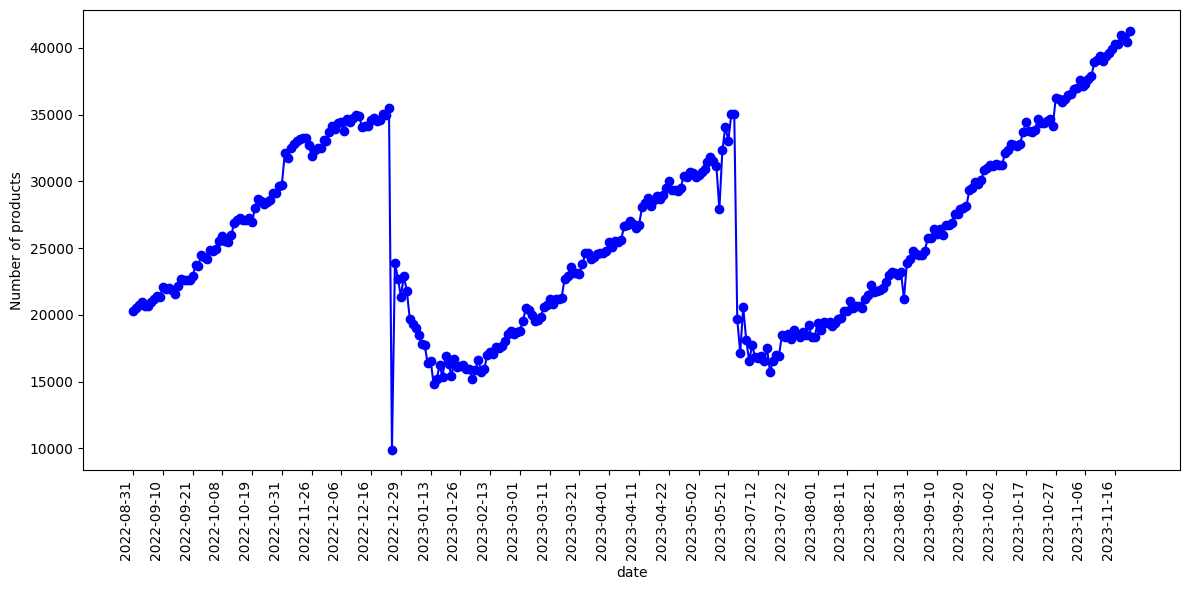

In [ ]:
# Bibliotheken laden
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

# Pfad zu Dateien
directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Dictionary für productIDs pro Tag
product_ids_per_day = {}

# Listen für Daten
date_values = []
different_prices_counts = []

# sortierte Liste für json Dateien
json_files = sorted([f for f in os.listdir(directory_path)
   if f.endswith('.json')])

# for Schleife
for i, filename in enumerate(json_files):
    file_path = os.path.join(directory_path, filename) # neuer Pfad

    #  Dateigröße prüfen, darf nicht leer sein
    if os.path.getsize(file_path) > 0:
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                json_data = json.load(file) # Daten aus json datei laden
                if filename[:-5] not in product_ids_per_day:
                    product_ids_per_day[filename[:-5]] = Counter() #leerer Counter und filename ohne .json am ende

                #  Counter für productIDs aktualisiert
                product_ids_per_day[filename[:-5]].update([entry["productID"] for entry in json_data])

                # Fehler
            except json.JSONDecodeError as e:
                print(f"Error decoding the data {filename}: {e}")

# Durchlaufe gesammelte Daten
for date, product_ids_counter in product_ids_per_day.items():
    different_prices_count = sum(1 for count in product_ids_counter.values() if count > 0) #Daten mit counter
    date_values.append(date) #Datum zur Liste hinzufügen
    different_prices_counts.append(different_prices_count)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, different_prices_counts, marker='o', linestyle='-', color='b') #y- und x-Achse und verbinden Datenpunkte
plt.xlabel('date') #Beschriftung
plt.ylabel('Number of products')
plt.xticks(rotation=90, ha='right')  # Datumsbeschriftung vertikal
plt.xticks(range(0, len(date_values), 10), date_values[::10])  # nur jedes zehnte Datum
plt.tight_layout()
plt.show()

## ProductIDs-Muster: Anzahl zum Zeitpunkt der drei großen Sales

In [ ]:
import os
import json

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

product_ids_per_day = {}

# Tage bevor, am und nach den Sales
target_days = ['2023-06-02','2023-06-06','2023-06-22','2023-06-26','2023-06-30',
               '2023-07-04','2023-07-09','2023-07-10','2023-07-11','2023-07-12',
               '2023-07-13','2023-07-14','2023-07-15','2023-07-16','2023-07-17',
               '2023-07-18','2023-07-19','2023-07-20','2023-07-21','2023-07-22'
               '2022-11-22', '2022-11-23', '2022-11-24','2022-11-25', '2022-11-26',
               '2022-11-27','2022-11-28', '2022-11-29'
               '2022-12-22','2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27','2022-12-28', '2022-12-29', '2022-12-30','2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04','2023-01-05',
               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09','2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13','2023-01-14','2023-01-15',
               '2023-01-16', '2023-01-17', '2023-01-18','2023-01-19','2023-01-20']

# Pfad zu Dateien mit .json am Ende
for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)

        # Datum steht in Dateiname vor Punkt
        date = filename.split('.')[0]

        # wenn nach Datum gesucht ist, lade die Datei
        if date in target_days:
            with open(file_path, 'r', encoding='utf-8') as file:
                try:
                    json_data = json.load(file)

                    # ProductIDs in json-data extrahieren
                    product_ids = set(entry["productID"] for entry in json_data)

                    # Anzahl ProductIDs an einem Tag speichern
                    product_ids_per_day[date] = len(product_ids)

                except json.JSONDecodeError:
                    print(f"Fehler beim Decodieren der Datei {filename}: Ignoriere diese Datei.")

# Gib Anzahl aus
for day in target_days:
    if day in product_ids_per_day:
        print(f"Anzahl der verschiedenen ProductIDs am {day}: {product_ids_per_day[day]}")
    else:
        print(f"Keine Daten für den Tag {day} vorhanden.")

Fehler beim Decodieren der Datei 2022-11-23.json: Ignoriere diese Datei.
Anzahl der verschiedenen ProductIDs am 2023-06-02: 35013
Anzahl der verschiedenen ProductIDs am 2023-06-06: 35025
Anzahl der verschiedenen ProductIDs am 2023-06-22: 19667
Anzahl der verschiedenen ProductIDs am 2023-06-26: 17155
Anzahl der verschiedenen ProductIDs am 2023-06-30: 20581
Anzahl der verschiedenen ProductIDs am 2023-07-04: 18152
Anzahl der verschiedenen ProductIDs am 2023-07-09: 16559
Anzahl der verschiedenen ProductIDs am 2023-07-10: 17725
Anzahl der verschiedenen ProductIDs am 2023-07-11: 16821
Anzahl der verschiedenen ProductIDs am 2023-07-12: 16778
Anzahl der verschiedenen ProductIDs am 2023-07-13: 16918
Anzahl der verschiedenen ProductIDs am 2023-07-14: 16533
Anzahl der verschiedenen ProductIDs am 2023-07-15: 17519
Anzahl der verschiedenen ProductIDs am 2023-07-16: 15740
Anzahl der verschiedenen ProductIDs am 2023-07-17: 16539
Anzahl der verschiedenen ProductIDs am 2023-07-18: 16966
Anzahl der vers

## Sales-Muster: Anzahl der ProductIDs mit unterschiedlichen Preisen im Laufe der Zeit (Figure 3)

Fehler beim Decodieren der Datei 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427)
Fehler beim Decodieren der Datei 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526)
Fehler beim Decodieren der Datei 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834)
Fehler beim Decodieren der Datei 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873)
Fehler beim Decodieren der Datei 2023-09-23.json: Unterminated string starting at: line 18702 column 322 (char 14997482)
Fehler beim Decodieren der Datei 2023-10-09.json: Expecting value: line 7 column 1 (char 3742)
Fehler beim Decodieren der Datei 2023-10-14.json: Expecting value: line 17490 column 1 (char 13923667)
Fehler beim Decodieren der Datei 2023-10-16.json: Expecting value: line 7 column 1 (char 3631)
Fehler beim Decodieren der Datei 2023-11-20.json: Expecting value: line 78971 column 1 (char 61400645)


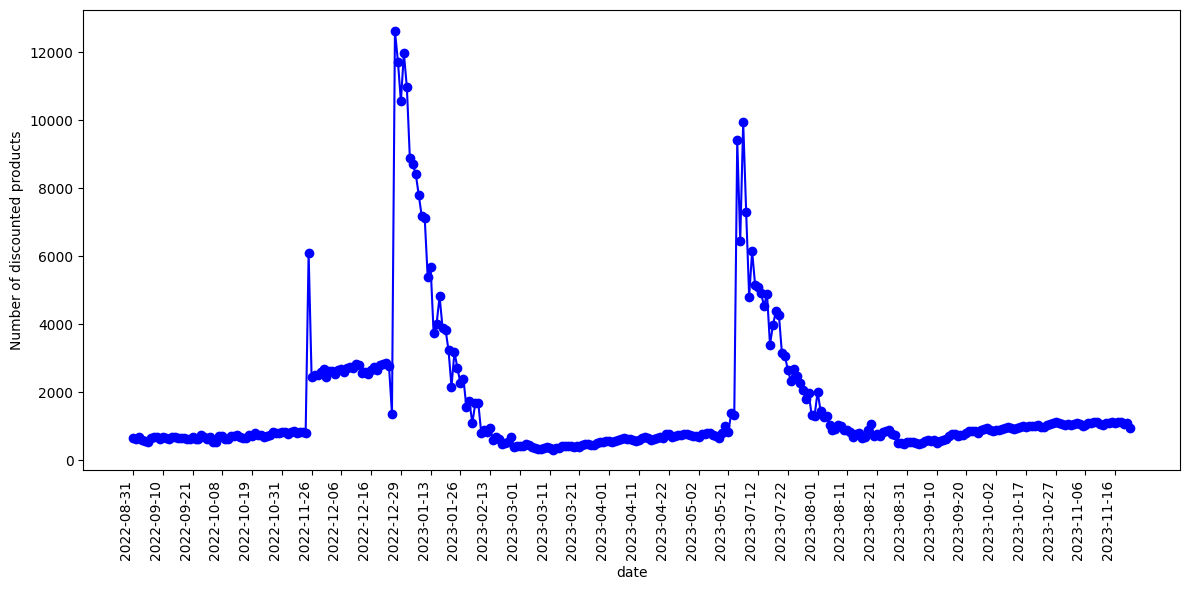

In [ ]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

product_ids_per_day = {}

# Listen für die Daten
date_values = []
different_prices_counts = []

# Sortierte Liste für alle json Dateien
json_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.json')])

# Liste wird durchlaufen und Index zugewiesen
for i, filename in enumerate(json_files):
    file_path = os.path.join(directory_path, filename) #vollständiger Pfad wird erstellt

    # Dateigröße überprüfen
    if os.path.getsize(file_path) > 0:
        with open(file_path, 'r', encoding='utf-8') as file: # json Datei öffnen
            try:
                # json Datei laden
                json_data = json.load(file)

                # Set für ProductIDs ertsellen
                if filename[:-5] not in product_ids_per_day:
                    product_ids_per_day[filename[:-5]] = set()

                # json_data durchlaufen und nach EIgenschaften filtern
                for entry in json_data:
                    if entry.get("productBrand") == "zara" and \
                       entry.get("productPrice") is not None and \
                       entry.get("productOldPrice") is not None and \
                       entry.get("productPrice") < entry.get("productOldPrice"):
                        product_ids_per_day[filename[:-5]].add(entry["productID"])

            except json.JSONDecodeError as e:
                print(f"Fehler beim Decodieren der Datei {filename}: {e}")

# Durchlaufe product_ids_per_day, um Anzahl an productIDs mit unterschiedlichen Preisen zu zählen
for date, product_ids_set in product_ids_per_day.items():
    different_prices_counts.append(len(product_ids_set))
    date_values.append(date)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, different_prices_counts, marker='o', linestyle='-', color='b')
plt.xlabel('date')
plt.ylabel('Number of discounted products')
plt.xticks(rotation=90, ha='right')  # x-Achsen beschriftung vertikal
plt.xticks(range(0, len(date_values), 10), date_values[::10])  # Zeige jedes zehnte Datum an
plt.tight_layout()
plt.show()


# 2. Forschungsfrage: Location

## Liste mit der Anzahl der genannten Länder ausgeben

In [ ]:
import os
import json

json_folder_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Häufigkeit jedes Landes
country_count = {}

# json Dateien durchsuchen
for json_file_name in os.listdir(json_folder_path):
    # sicherstellen, dass es sich um eine json Datei handelt
    if json_file_name.endswith('.json'):
        json_file_path = os.path.join(json_folder_path, json_file_name)

        # json Datei öffnen
        with open(json_file_path, 'r') as json_file:
            try:
                # Inhalt lesen
                json_content = json_file.read().lstrip()
                # leere Dateien weglassen
                if not json_content:
                    continue

                # Inhalt laden
                json_data = json.loads(json_content)

                # Für jedes Produkt überprüfen ob "productOrigin" und "productID" vorhanden
                for product in json_data:
                    if 'productOrigin' in product and 'productID' in product:
                        product_origin = product.get('productOrigin')

                        # Überprüfen, ob product_origin als liste existiert
                        if product_origin and isinstance(product_origin, list):
                            # Häufigkeit des Landes zählen
                            for country in product_origin:
                                country_count[country] = country_count.get(country, 0) + 1
            except json.JSONDecodeError as e:
                print(f'Fehler beim Dekodieren von {json_file_name}: {str(e)}')

# Ausgabe wie oft gezählt
for country, count in country_count.items():
    print(f'{country}: {count} mal')




Fehler beim Dekodieren von 2023-10-16.json: Expecting value: line 7 column 1 (char 3631)
Fehler beim Dekodieren von 2023-11-20.json: Expecting value: line 78971 column 1 (char 61400645)
Fehler beim Dekodieren von 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873)
Fehler beim Dekodieren von 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427)
Fehler beim Dekodieren von 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834)
Fehler beim Dekodieren von 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526)
Fehler beim Dekodieren von 2023-10-09.json: Expecting value: line 7 column 1 (char 3742)
Fehler beim Dekodieren von 2023-10-14.json: Expecting value: line 17490 column 1 (char 13923667)
Fehler beim Dekodieren von 2023-09-23.json: Unterminated string starting at: line 18702 column 322 (char 14997482)
Morocco: 2698151 mal
China: 7319766 mal
Turkey: 3205349 mal
India: 998310 mal
Sri Lanka: 6346 mal
Cambodia: 652147 mal
P

## Verteilung der Produktionsländer nach Kontinenten (Figure 5)

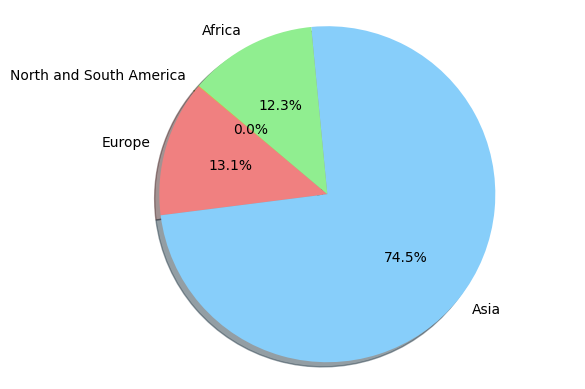

In [ ]:
import matplotlib.pyplot as plt

# Liste der Länder und deren Häufigkeit (Ergebnis von oben)
countries_data = {
    'Marokko': 2698151,
    'China': 7319766,
    'Türkei': 3205349,
    'Indien': 998310,
    'Sri Lanka': 6346,
    'Kambodscha': 652147,
    'Portugal': 1120283,
    'Bangladesch': 2991371,
    'Myanmar': 249300,
    'Pakistan': 846235,
    'Indonesien': 72615,
    'Italien': 463382,
    'Schweden': 53755,
    'Deutschland': 77752,
    'Spanien': 1086823,
    'Äthiopien': 2798,
    'Vietnam': 560074,
    'Tschechische Republik': 33422,
    'Slowakei': 6826,
    'Litauen': 11116,
    'Niederlande': 2400,
    'Malaysia': 449,
    'Laos': 148610,
    'Madagaskar': 22204,
    'Ägypten': 51689,
    'Republik Nordmazedonien': 1712,
    'Albanien': 20744,
    'Vereinigte Staaten von Amerika': 1737,
    'Tunesien': 43093,
    'Peru': 4193,
    'Bulgarien': 34112,
    'Rumänien': 16498,
    'Serbien': 18976,
    'Mauritius': 2760,
    'Frankreich': 9607,
    'Ungarn': 1468,
    'Slowenien': 1671,
    'Taiwan, China': 4284,
    'Großbritannien': 16453,
    'Belgien': 14479,
    'Dänemark': 1841,
    'Polen': 2976,
    'Brasilien': 2079,
    'Moldawien': 4583,
    'Finnland': 1191,
    'Hongkong SAR': 809,
    'Japan': 656,
    'Bosnien und Herzegowina': 91
}

# Länder den Kontinenten zuordnen
continent_mapping = {
    'Europe': ['Portugal', 'Italien', 'Schweden', 'Deutschland', 'Spanien', 'Tschechische Republik', 'Slowakei',
               'Litauen', 'Niederlande', 'Republik Nordmazedonien', 'Albanien', 'Bulgarien', 'Rumänien', 'Serbien',
               'Frankreich', 'Ungarn', 'Slowenien', 'Großbritannien', 'Belgien', 'Dänemark', 'Polen',
               'Bosnien und Herzegowina','Moldawien', 'Finnland'],
    'Asia': ['China', 'Türkei', 'Indien', 'Sri Lanka', 'Kambodscha', 'Bangladesch', 'Myanmar', 'Pakistan', 'Indonesien',
              'Vietnam', 'Malaysia', 'Laos', 'Taiwan, China', 'Hongkong', 'Japan'],
    'Africa': ['Marokko', 'Äthiopien', 'Madagaskar', 'Ägypten', 'Tunesien', 'Mauritius'],
    'North and South America': ['Vereinigte Staaten von Amerika', 'Peru', 'Brasilien']
}

# zu Beginn Häufigkeit 0 für jeden Kontinenten
continent_counts = {continent: 0 for continent in continent_mapping.keys()}

# Berechne Häufigkeit
for continent, countries in continent_mapping.items():
    continent_counts[continent] = sum(countries_data.get(country, 0) for country in countries)

# Diagramm Eigenschaften
labels = list(continent_counts.keys())
sizes = list(continent_counts.values())
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0, 0, 0, 0)

# Erstelle ein Pie-Diagramm
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Diagramm als Kreis anzeigen
plt.show()


## Weltkarte (Figure 5)

<ipython-input-16-595bb069efb6>:62: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


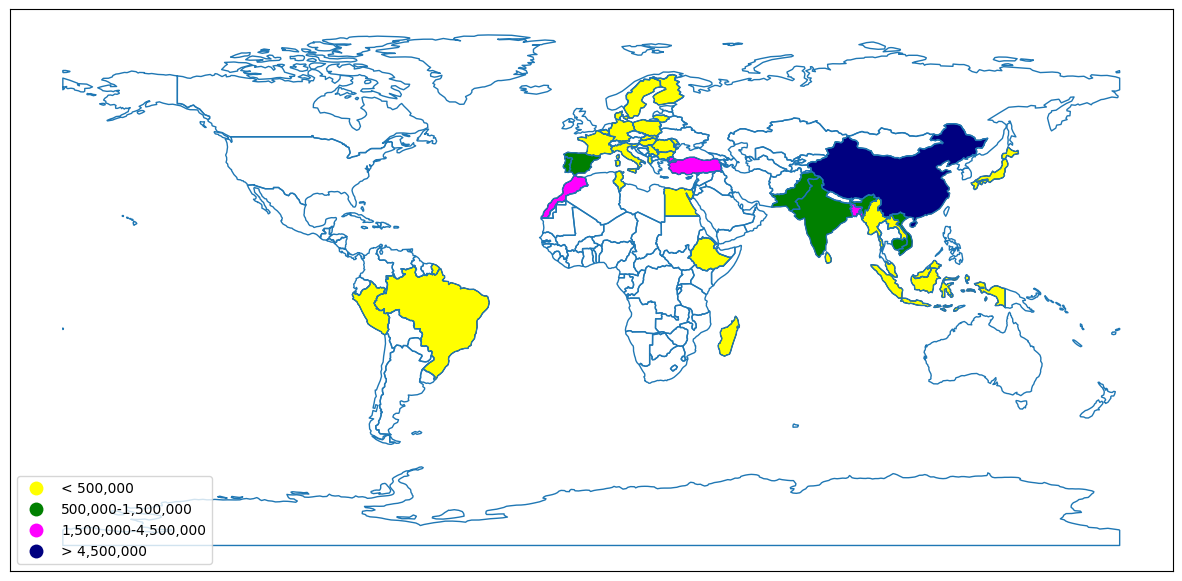

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib.colors as colors

# Länder mit Häufigkeit
countries_data = {
    'Morocco': 2698151,
    'China': 7319766,
    'Turkey': 3205349,
    'India': 998310,
    'Sri Lanka': 6346,
    'Cambodia': 652147,
    'Portugal': 1120283,
    'Bangladesh': 2991371,
    'Myanmar': 249300,
    'Pakistan': 846235,
    'Indonesia': 72615,
    'Italy': 463382,
    'Sweden': 53755,
    'Germany': 77752,
    'Spain': 1086823,
    'Ethiopia': 2798,
    'Vietnam': 560074,
    'the Czech Republic': 33422,
    'Slovakia': 6826,
    'Lithuania': 11116,
    'Holland': 2400,
    'Malaysia': 449,
    'Laos': 148610,
    'Madagascar': 22204,
    'Egypt': 51689,
    'the Republic of North Macedonia': 1712,
    'Albania': 20744,
    'the United States of America': 1737,
    'Tunisia': 43093,
    'Peru': 4193,
    'Bulgaria': 34112,
    'Romania': 16498,
    'Serbia': 18976,
    'Mauritius': 2760,
    'France': 9607,
    'Hungary': 1468,
    'Slovenia': 1671,
    'Taiwan, China': 4284,
    'Great Britain': 16453,
    'Belgium': 14479,
    'Denmark': 1841,
    'Poland': 2976,
    'Brazil': 2079,
    'Moldova': 4583,
    'Finland': 1191,
    'Hong Kong SAR': 809,
    'Japan': 656,
    'Bosnia and Herzegovina': 91
}

# Weltkarte laden
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Spalte für die Häufigkeit in der Weltkarte erstellen
world['Frequency'] = world['name'].map(countries_data)

# Bereiche festlegen
bins = [0, 500000, 1500000, 4500000, 8000000]
labels = ['< 500,000', '500,000-1,500,000', '1,500,000-4,500,000', '> 4,500,000']
world['ColorCategory'] = pd.cut(world['Frequency'], bins=bins, labels=labels)

# Farben der Bereiche festlegen
cmap = colors.ListedColormap(['yellow', 'green', 'magenta', 'navy'])

# Plotte Weltkarte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='ColorCategory', ax=ax, cmap=cmap, edgecolor='k', linewidth=0.7, legend=True, legend_kwds={'loc': 'lower left'})

# keine Achsenbeschriftung
ax.set_xticks([])
ax.set_yticks([])

plt.show()


## Chart mit Europäischer und Anderer ProductOrigin über die Zeit hinweg (Figure 8)

Fehler beim Decodieren der Datei 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-05-10.json: Expecting value: line 1 column 1 (char 0). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-05-11.json: Expecting value: line 1 column 1 (char 0). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-05-12.json: Expecting value: line 1 column 1 (char 0). Datei wird ignoriert.
Fehler beim Decodieren der Datei 2023-05-14.json: Expecting value: line 1 column 1 (char 0). Datei wird ignoriert.
Fehler beim Decodieren der Date

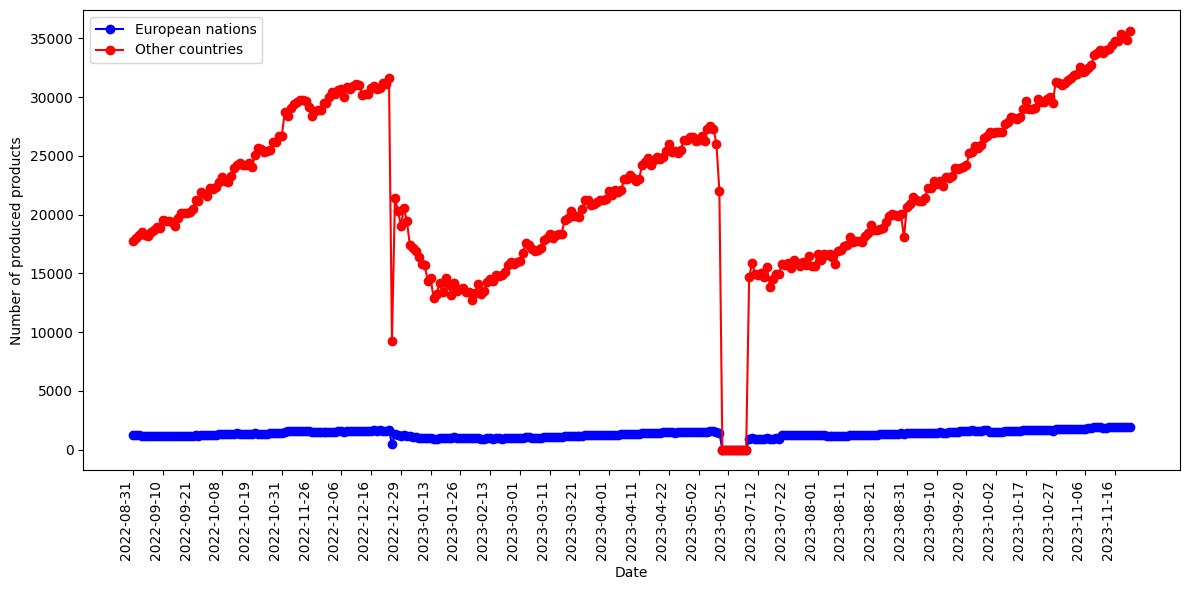

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

european_countries = ['Portugal', 'Italien', 'Schweden', 'Deutschland', 'Spanien', 'Tschechische Republik', 'Slowakei',
                      'Litauen', 'Niederlande', 'Republik Nordmazedonien', 'Albanien', 'Bulgarien', 'Rumänien', 'Serbien',
                      'Frankreich', 'Ungarn', 'Slowenien', 'Großbritannien', 'Belgien', 'Dänemark', 'Polen',
                      'Bosnien und Herzegowina','Moldawien', 'Finnland']

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Liste zum Datensammeln
dates_for_plot = []
counts_per_day_dict = defaultdict(lambda: {'european': 0, 'other': 0}) # defaultdict damit kein error sondern 0 zurückgegeben wird

for idx, filename in enumerate(sorted(os.listdir(directory_path))):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)

        try:
            # Öffne und lade json Datei und zählt Anzahl der Produkte aus europäischen Ländern und anderen Ländern
            european_count = Counter()
            other_count = Counter()
            with open(file_path, 'r', encoding='utf-8') as file:
                json_data = json.load(file)
                for entry in json_data:
                    product_id = entry.get("productID")
                    origin = entry.get("productOrigin")
                    if product_id and origin:
                        if any(country in origin for country in european_countries): # je nach dem wo hergestellt counter 1 hoch
                            european_count[product_id] += 1
                        else:
                            other_count[product_id] += 1

            # Füge die Anzahl für diesen Tag zur Liste hinzu
            date = filename.split('.')[0]  # Datum extrahieren
            counts_per_day_dict[date] = {'european': len(european_count), 'other': len(other_count)}
            dates_for_plot.append(date)  # Datum zur Liste hinzufügen

        except (json.JSONDecodeError, UnicodeDecodeError) as e:
            print(f"Fehler beim Decodieren der Datei {filename}: {e}. Datei wird ignoriert.")

# Daten vorbereiten
european_counts_per_day = [counts_per_day_dict[date]['european'] for date in dates_for_plot]
other_counts_per_day = [counts_per_day_dict[date]['other'] for date in dates_for_plot]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_for_plot, european_counts_per_day, marker='o', linestyle='-', color='b', label='European nations')
plt.plot(dates_for_plot, other_counts_per_day, marker='o', linestyle='-', color='r', label='Other countries')
plt.xlabel('Date')
plt.ylabel('Number of produced products')
plt.xticks(rotation=90, ha='right', ticks=dates_for_plot[::10])  # Zeige nur jedes zehnte Datum an
plt.legend()
plt.tight_layout()
plt.show()

## 'BASESTYLE' über Zeitverlauf (Figure 7)

Fehler beim Decodieren der Datei 2023-10-16.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-29.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-05.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-15.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-13.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-23.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-07-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-25.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-19.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-09.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-18.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-24.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-11-20.json: I

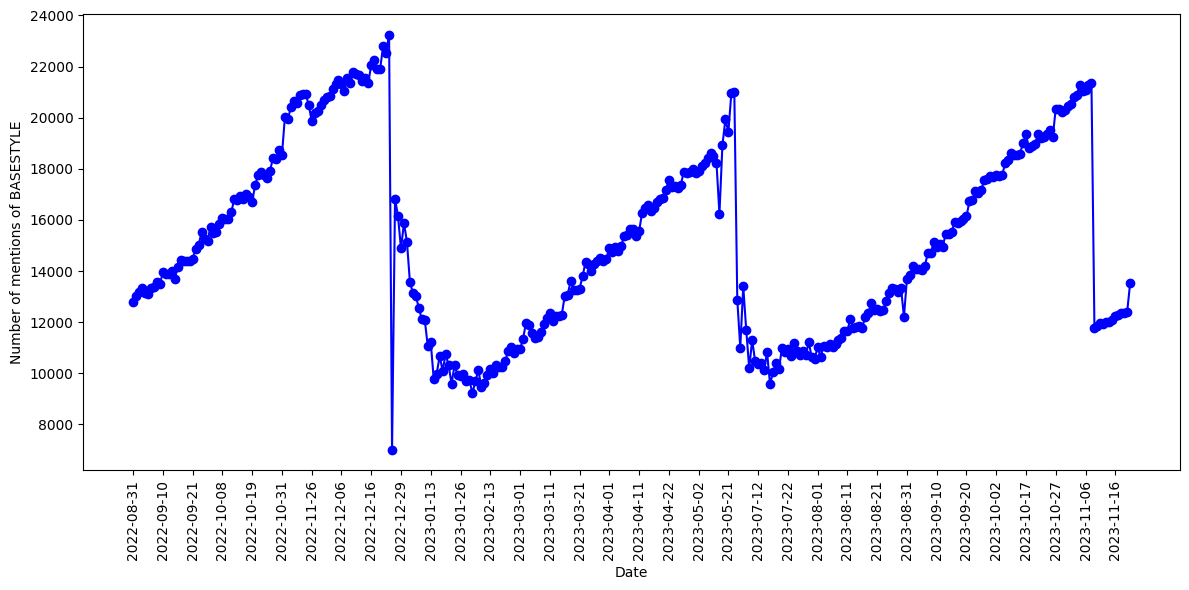

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Liste Erwähnungen 'BASESTYLE'
basestyle_counts_per_file = []

# Liste Datumsangaben
dates = []
# nach den json Dateien durchsuchen
for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Set, um 'productID'-'basestyle' Paare zu speichern
                counted_product_ids = set()

                # Zähle die Anzahl der Erwähnungen von 'BASESTYLE'
                basestyle_count = 0
                for entry in json_data:
                    product_id = entry.get("productID")
                    outfit_id = entry.get("productOutfitID")
                    if outfit_id == 'BASESTYLE' and product_id not in counted_product_ids:
                        basestyle_count += 1
                        counted_product_ids.add(product_id)

                # Anzahl von 'BASESTYLE' für diese Datei
                basestyle_counts_per_file.append(basestyle_count)

                # Datum aus Dateinamen
                date = filename.split('.')[0]
                dates.append(date)

            except json.JSONDecodeError:
                print(f"Fehler beim Decodieren der Datei {filename}: Ignoriere diese Datei.")

# Datumsangaben sortieren
sorted_dates, sorted_counts = zip(*sorted(zip(dates, basestyle_counts_per_file)))

# Datumsangaben in numerische Werte
date_values = np.arange(len(sorted_dates))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, sorted_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of mentions of BASESTYLE')
plt.xticks(date_values[::10], sorted_dates[::10], rotation=90)
plt.tight_layout()
plt.show()


## Woher kommen Produkte mit ProduktOutfitID == Basestyle? (Figure 6)

In [ ]:
import os
import json
from collections import Counter

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Counter für Häufigkeit der 'ProductOrigin'
origin_counter = Counter()

# Counter für Produkte ohne 'ProductOrigin'
no_origin_counter = Counter()

# Nach den json Dateien durchsuchen
for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Nur Produkte mit 'productOutfitID' == 'BASESTYLE'
                basestyle_products = [entry for entry in json_data if entry.get("productOutfitID") == 'BASESTYLE']

                for entry in basestyle_products:
                    # 'ProductOrigin' überprüfen
                    if 'productOrigin' in entry and entry['productOrigin']:
                        origin_counter.update(entry['productOrigin'])
                    else:
                        no_origin_counter.update(['no Origin'])

            except json.JSONDecodeError:
                print(f"Fehler beim Decodieren der Datei {filename}: Ignoriere diese Datei.")

# prozentuale Verteilung für 'ProductOrigin'
total_products_with_origin = sum(origin_counter.values())
percentage_distribution = {origin: (count / total_products_with_origin) * 100 for origin, count in origin_counter.items()}

# Produkte ohne 'ProductOrigin'
total_products = total_products_with_origin + no_origin_counter['no Origin']
no_origin_percentage = (no_origin_counter['no Origin'] / total_products) * 100

# Zähler für Produkte ohne 'ProductOrigin' der Verteilung hinzufügen
percentage_distribution['no Origin'] = no_origin_percentage

# Prozentuale Verteilung ausgeben
for origin, percentage in percentage_distribution.items():
    print(f'{origin}: {percentage:.2f}%')

Fehler beim Decodieren der Datei 2023-10-16.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-29.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-05.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-15.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-13.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-23.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-07-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-25.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-19.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-09.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-18.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-24.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-11-20.json: I

# 3. Forschungsfrage: Product Life Cycle

## 'categoryID' 616506 über Zeit (Figure 9)

Fehler beim Decodieren der Datei 2023-10-16.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-29.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-05.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-15.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-13.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-23.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-07-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-25.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-19.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-09.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-18.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-24.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-11-20.json: I

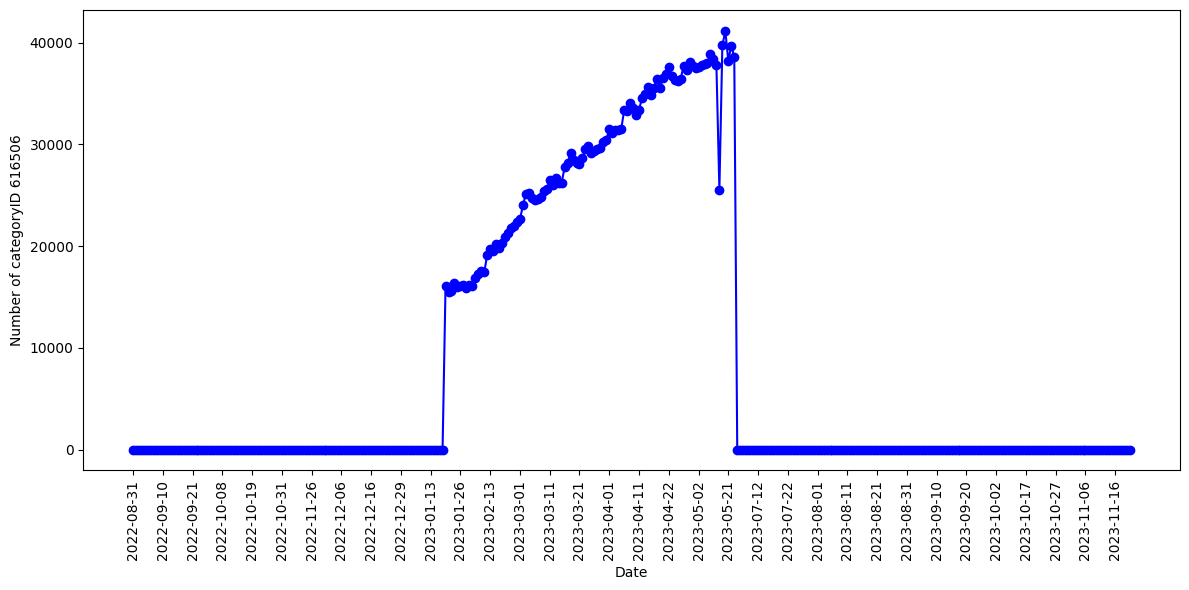

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Liste Erwähnung '616506'
category_counts_per_file = []

# Liste Datumsangaben
dates = []

# nach den json Dateien durchsuchen
for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Counter für Erwähnungen von '616506' in 'categoryID'
                category_count = sum(1 for entry in json_data if entry.get("categoryID") == 616506)

                # Anzahl speichern
                category_counts_per_file.append(category_count)

                # Datum aus Dateinamen
                date = filename.split('.')[0]
                dates.append(date)

            except json.JSONDecodeError:
                print(f"Fehler beim Decodieren der Datei {filename}: Ignoriere diese Datei.")

# Datumsangaben sortieren
sorted_dates, sorted_counts = zip(*sorted(zip(dates, category_counts_per_file)))

# Datumsangaben in numerische Werte
date_values = np.arange(len(sorted_dates))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, sorted_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of categoryID 616506')
plt.xticks(date_values[::10], sorted_dates[::10], rotation=90)
plt.tight_layout()
plt.show()

## 'categoryID' 1719887 über Zeit (Figure 10)

Fehler beim Decodieren der Datei 2023-10-16.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-29.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-05.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-15.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-13.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-23.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-07-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-25.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-19.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-09.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-08.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-05-18.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-06-24.json: Ignoriere diese Datei.
Fehler beim Decodieren der Datei 2023-11-20.json: I

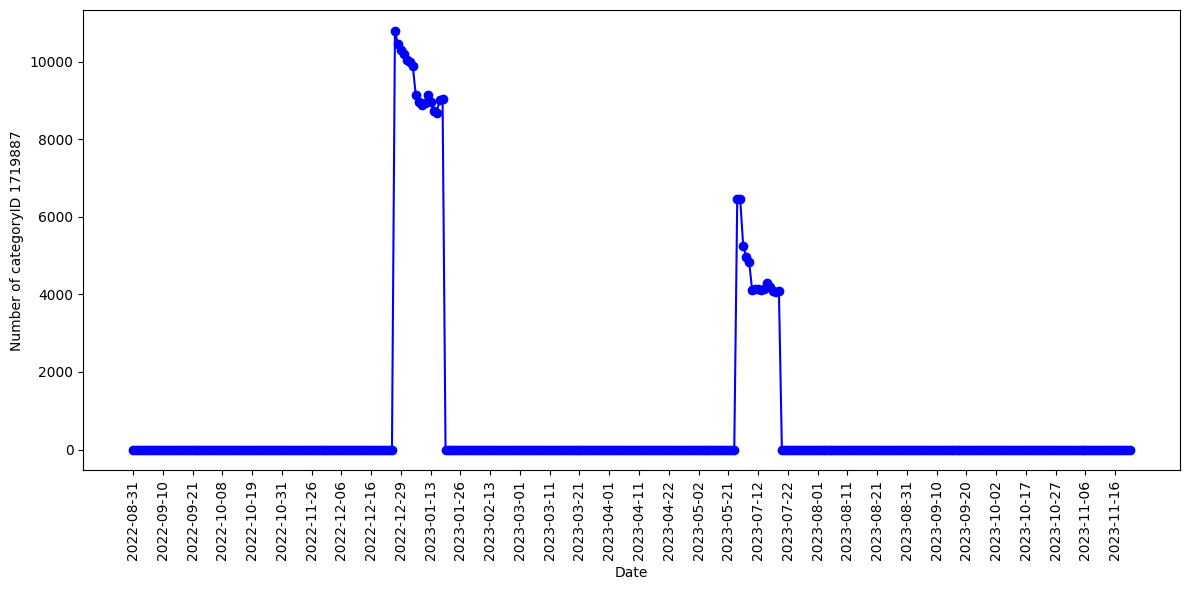

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Liste Erwähnungen '1775266'
category_counts_per_file = []

# Liste Datumsangaben
dates = []

# nach den json Dateien durchsuchen
for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Counter für Erwähnungen von '1719887' in 'categoryID'
                category_count = sum(1 for entry in json_data if entry.get("categoryID") == 1719887)

                # Anzahl speichern
                category_counts_per_file.append(category_count)

                # Datum aus Dateinamen
                date = filename.split('.')[0]
                dates.append(date)

            except json.JSONDecodeError:
                print(f"Fehler beim Decodieren der Datei {filename}: Ignoriere diese Datei.")

# Datumsangaben sortieren
sorted_dates, sorted_counts = zip(*sorted(zip(dates, category_counts_per_file)))

# Datumsangaben in numerische Werte
date_values = np.arange(len(sorted_dates))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, sorted_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of categoryID 1719887')
plt.xticks(date_values[::10], sorted_dates[::10], rotation=90)
plt.tight_layout()
plt.show()

# 4. Forschungsfrage: Modetrends

## "productColorName" die das Wort "Brown" beinhalten über Zeit (Figure 11)


Fehler beim Decodieren der Datei 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427)
Fehler beim Decodieren der Datei 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526)
Fehler beim Decodieren der Datei 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834)
Fehler beim Decodieren der Datei 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873)
Fehler beim Decodieren der Datei 2023-09-23.json: Unterminated string starting at: line 18702 column 322 (char 14997482)
Fehler beim Decodieren der Datei 2023-10-09.json: Expecting value: line 7 column 1 (char 3742)
Fehler beim Decodieren der Datei 2023-10-14.json: Expecting value: line 17490 column 1 (char 13923667)
Fehler beim Decodieren der Datei 2023-10-16.json: Expecting value: line 7 column 1 (char 3631)
Fehler beim Decodieren der Datei 2023-11-20.json: Expecting value: line 78971 column 1 (char 61400645)


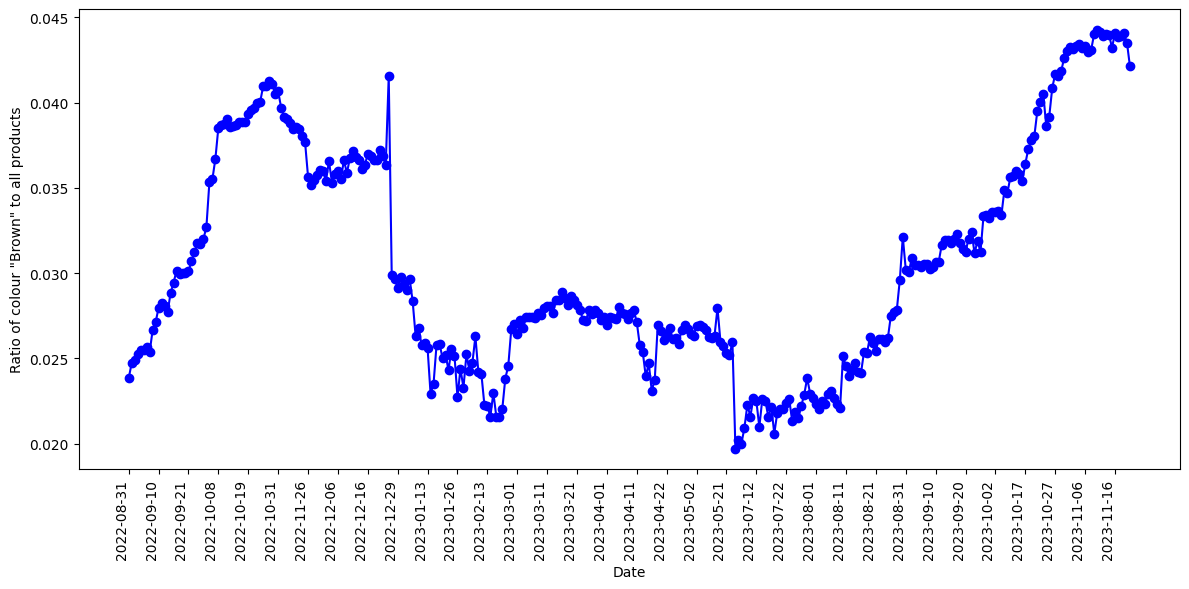

In [ ]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Liste zum Daten sammeln
date_values = []
brown_color_ratios = []

# Nach json Dateien durchsuchen und sortieren
json_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.json')])

for i, filename in enumerate(json_files):
    file_path = os.path.join(directory_path, filename)

    # Datei nicht leer
    if os.path.getsize(file_path) > 0:
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Produkte mit "productBrand": "zarahome" ausfiltern
                filtered_data = [entry for entry in json_data if entry.get("productBrand") != "zarahome"]

                # Anzahl Ausprägungen "Brown" bei "productColorName"
                brown_color_count = sum(
                    "brown" in entry.get("productColorName", "").lower() for entry in filtered_data if entry.get("productColorName")
                )

                # Verhältnis berechnen
                total_products_count = len(filtered_data)
                brown_color_ratio = brown_color_count / total_products_count if total_products_count > 0 else 0

                # Daten zur Liste
                date_values.append(filename[:-5])  # '.json' weg aus Dateinamen
                brown_color_ratios.append(brown_color_ratio)
            except json.JSONDecodeError as e:
                print(f"Fehler beim Decodieren der Datei {filename}: {e}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, brown_color_ratios, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Ratio of colour "Brown" to all products')
plt.xticks(rotation=90, ha='right')  # Datumsbeschriftungen
plt.xticks(range(0, len(date_values), 10), date_values[::10])  # Zeige nur jedes zehnte Datum an
plt.tight_layout()
plt.show()


## "productColorName" die das Wort "Pink" beinhalten über Zeit (Figure 12)

Fehler beim Decodieren der Datei 2022-11-23.json: Expecting ',' delimiter: line 26308 column 726 (char 20594427)
Fehler beim Decodieren der Datei 2023-02-15.json: Extra data: line 47031 column 2 (char 37256526)
Fehler beim Decodieren der Datei 2023-03-22.json: Expecting value: line 65580 column 1 (char 51716834)
Fehler beim Decodieren der Datei 2023-04-12.json: Expecting value: line 56310 column 1 (char 44401873)
Fehler beim Decodieren der Datei 2023-09-23.json: Unterminated string starting at: line 18702 column 322 (char 14997482)
Fehler beim Decodieren der Datei 2023-10-09.json: Expecting value: line 7 column 1 (char 3742)
Fehler beim Decodieren der Datei 2023-10-14.json: Expecting value: line 17490 column 1 (char 13923667)
Fehler beim Decodieren der Datei 2023-10-16.json: Expecting value: line 7 column 1 (char 3631)
Fehler beim Decodieren der Datei 2023-11-20.json: Expecting value: line 78971 column 1 (char 61400645)


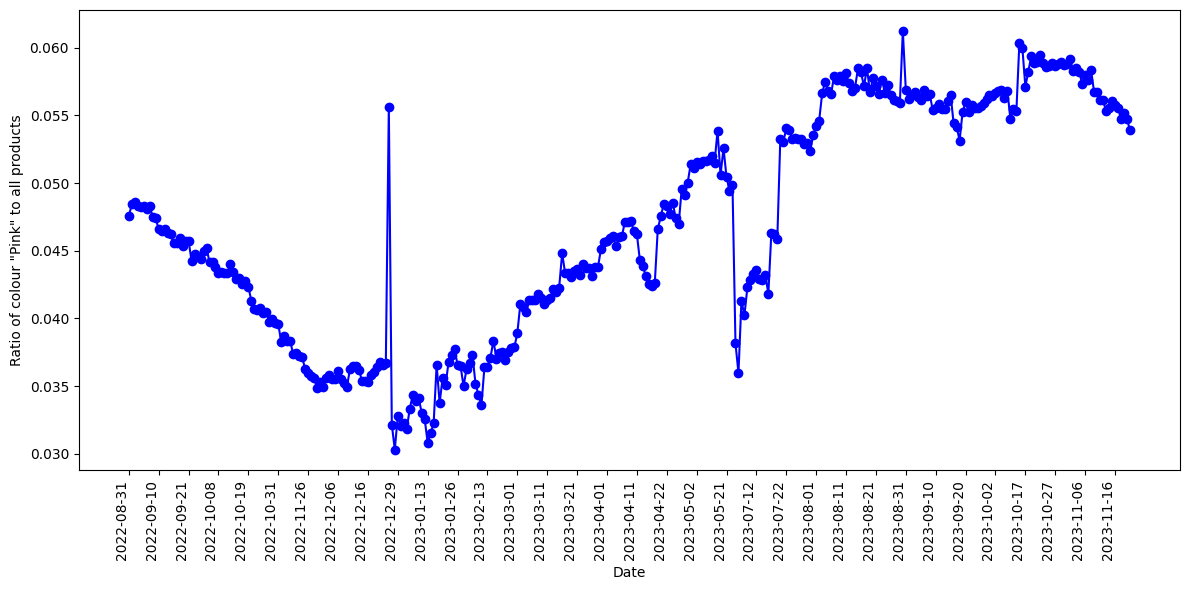

In [ ]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

directory_path = '/content/gdrive/MyDrive/entpackter_inhalt/de/'

# Daten sammeln
date_values = []
pink_color_ratios = []

# json Dateien durchsuchen und sortieren
json_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.json')])

for i, filename in enumerate(json_files):
    file_path = os.path.join(directory_path, filename)

    # Größe der Datei > 0
    if os.path.getsize(file_path) > 0:
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # json Daten laden
                json_data = json.load(file)

                # Produkte mit "productBrand": "zarahome" ausfiltern
                filtered_data = [entry for entry in json_data if entry.get("productBrand") != "zarahome"]

                #Anzahl an Ausprägungen "Pink" bei "productColorName"
                pink_color_count = sum(
                    "pink" in entry.get("productColorName", "").lower() for entry in filtered_data if entry.get("productColorName")
                )

                # Verhältnis berechnen
                total_products_count = len(filtered_data)
                pink_color_ratio = pink_color_count / total_products_count if total_products_count > 0 else 0

                # Daten zur Liste hinzufügen
                date_values.append(filename[:-5])  # '.json' aus dem Dateinamen entfernen
                pink_color_ratios.append(pink_color_ratio)
            except json.JSONDecodeError as e:
                print(f"Fehler beim Decodieren der Datei {filename}: {e}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_values, pink_color_ratios, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Ratio of colour "Pink" to all products')
plt.xticks(rotation=90, ha='right')  # Rotiere Datumsbeschriftungen für bessere Lesbarkeit
plt.xticks(range(0, len(date_values), 10), date_values[::10])  # Zeige nur jedes zehnte Datum an
plt.tight_layout()
plt.show()


# Quellen

https://stackoverflow.com/questions/48373743/python-plot-with-matplotlib-a-json-file-data

https://stackoverflow.com/questions/20918641/how-to-find-unique-values-in-a-large-json-file

https://stackoverflow.com/questions/20918641/how-to-find-unique-values-in-a-large-json-file

https://de.matplotlib.net/stable/tutorials/introductory/pyplot.html

https://docs.kanaries.net/de/topics/Matplotlib/time-series-plot-matplotlib